In [1]:
#Import the needed libraries
import numpy as np
from scipy.integrate import quad
import matplotlib.pylab as plt

from fakequadrature import quadrature_weights

In [2]:
# Define the test functions both with sympy and nympy used for the tests
def f_1(x):
    return np.sin(x)

def f_2(x):
    return np.log(x**4+4) + 7

def f(x):
    return f_1(x)*(x<=0) + f_2(x)*(x>0)

In [3]:
# Define the parameters
a, b = -2, 2 # Integration interval

k = 20 # The shift parameter

disc = 0 # The discontinuity location

ep = 1.e-13 # Parameter for identify the left and right discontinuity limits

alpha = np.abs(f(0)-f(0+ep)) # The jump magnitude

shift = k*alpha # The shift

LenFor = 40 # Maximum degree for the polynomial interpolation

In [4]:
# Define the mapping functions
def S(x):
    return x*(x<=0)+(x+shift)*(x>0)

def Sc(x):
    return -((b-a)/2)*np.cos(np.pi*(x-a)/(b-a)) + (b+a)/2

In [5]:
# Compute the true integral
lt, _ = quad(f_1, a, disc)
rt, _ = quad(f_2, disc, b)
Itrue = lt + rt

In [6]:
Err, ErrCL, Errf = [], [], [] # Initialize
# Compute the weights and approximate the integral

for Deg in np.arange(1,LenFor,2):
    # Define the degree and the equispaced nodes
    N_nodes = Deg+1
    x = np.linspace(a,b,N_nodes)
    # Define the CL nodes (for comparison)
    xCL = Sc(x)
    # Define the funtion values for equispaced and CL nodes
    y = f(x)
    yCL = f(xCL)
    # Compute the weights for standard and CL weights 
    # and for the fake nodes approach
    w = quadrature_weights(x, (a,disc)) + quadrature_weights(x, (disc,b))
    wf = quadrature_weights(x, (a,disc), mapping = S) + quadrature_weights(x, (disc,b), mapping = S)
    wCL = quadrature_weights(xCL, (a,disc)) + quadrature_weights(xCL, (disc,b))
    
    # Approximate the integrals
    I  = y.dot(w)
    If  = y.dot(wf)
    ICL  = yCL.dot(wCL)
    # Compute the errors
    err = np.abs(I-Itrue)
    errf = np.abs(If-Itrue)
    errCL = np.abs(ICL-Itrue)
    
    Err.append(err); ErrCL.append(errCL); Errf.append(errf)

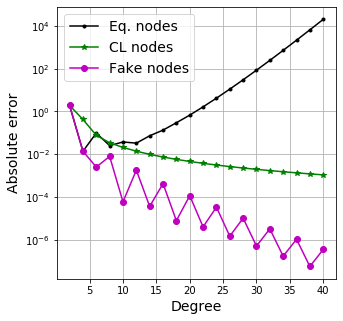

In [7]:
# Plotting tools
fig, ax = plt.subplots(1, 1,figsize=(5,5))
ax.cla()
asc = list(1+np.arange(1,LenFor,2))
ax.semilogy(asc,Err,'.-k',asc,ErrCL,'*-g',asc,Errf,'o-m')
ax.set_xlabel("Degree", fontsize = 14)
ax.set_ylabel("Absolute error", fontsize = 14)
ax.legend(["Eq. nodes","CL nodes","Fake nodes"],loc = 'best', fontsize = 14)
ax.grid(True)
plt.savefig("gibbsfig.png")
plt.show()

In [8]:
w

array([ 2.17076776e-02,  3.07873823e-01, -1.54370002e+00,  1.25309759e+01,
       -7.88016694e+01,  4.18896980e+02, -1.87727796e+03,  7.19116191e+03,
       -2.37745223e+04,  6.83995317e+04, -1.72309757e+05,  3.81755285e+05,
       -7.45688982e+05,  1.28463711e+06, -1.94709136e+06,  2.57887620e+06,
       -2.94111930e+06,  2.79517760e+06, -2.02740799e+06,  7.42882886e+05,
        7.42882886e+05, -2.02740799e+06,  2.79517760e+06, -2.94111930e+06,
        2.57887620e+06, -1.94709136e+06,  1.28463711e+06, -7.45688982e+05,
        3.81755285e+05, -1.72309757e+05,  6.83995317e+04, -2.37745223e+04,
        7.19116191e+03, -1.87727796e+03,  4.18896980e+02, -7.88016694e+01,
        1.25309759e+01, -1.54370002e+00,  3.07873823e-01,  2.17076776e-02])

In [9]:
wf

array([ 2.32113454e-02,  2.55111681e-01, -6.84899296e-01,  3.67458271e+00,
       -1.28359277e+01,  3.74935853e+01, -8.71400603e+01,  1.66363143e+02,
       -2.60995407e+02,  3.39996501e+02, -3.67811792e+02,  3.31348584e+02,
       -2.47332148e+02,  1.52587628e+02, -7.67045351e+01,  3.12855853e+01,
       -9.89864993e+00,  2.56603337e+00, -3.45866078e-01,  1.55319360e-01,
        1.55319360e-01, -3.45866078e-01,  2.56603337e+00, -9.89864993e+00,
        3.12855853e+01, -7.67045351e+01,  1.52587628e+02, -2.47332148e+02,
        3.31348584e+02, -3.67811792e+02,  3.39996501e+02, -2.60995407e+02,
        1.66363143e+02, -8.71400603e+01,  3.74935853e+01, -1.28359277e+01,
        3.67458271e+00, -6.84899296e-01,  2.55111681e-01,  2.32113454e-02])